# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline


#Math tools
from scipy import stats
from scipy.stats import skew,norm  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import scipy.stats as stats


#Visualizing tools

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action="ignore")

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


# Uploading the Data Set

In [2]:
raw_df = pd.read_csv('Housing_prices_data.csv')

# Observing the first  rows of the data set

In [3]:
raw_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Dependable Variable - Checking for normal distribution

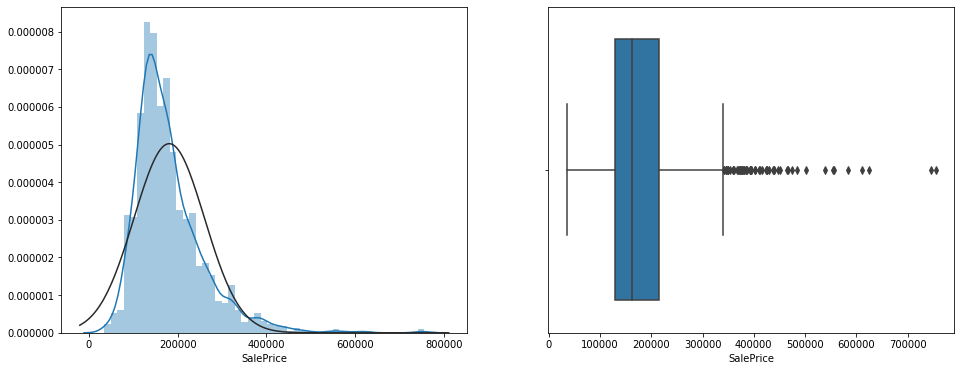

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529
--------------------------------------
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [4]:
f,ax = plt.subplots(1,2,figsize=(16,6))
sns.distplot(raw_df['SalePrice'],fit=norm,ax=ax[0])
sns.boxplot(raw_df['SalePrice'])
plt.show()

#skewness and kurtosis
print("Skewness: {}".format(raw_df['SalePrice'].skew()))
print("Kurtosis: {}".format(raw_df['SalePrice'].kurt()))
print("--------------------------------------")
print(raw_df['SalePrice'].describe())

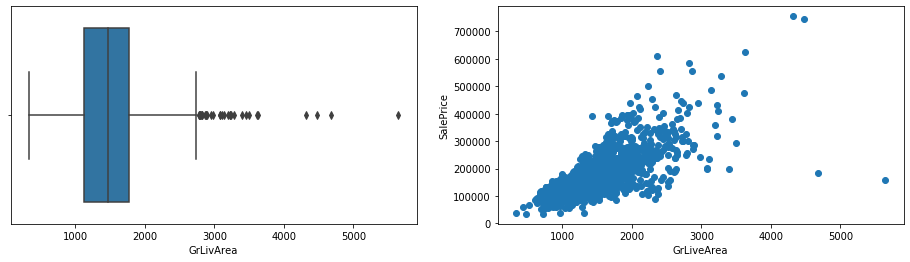

In [5]:
f,ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(raw_df['GrLivArea'],ax=ax[0])
plt.scatter(raw_df['GrLivArea'],raw_df['SalePrice'])
plt.xlabel('GrLiveArea')
plt.ylabel('SalePrice')
plt.show()

# Checking for categorial variables which were not classed as "object"

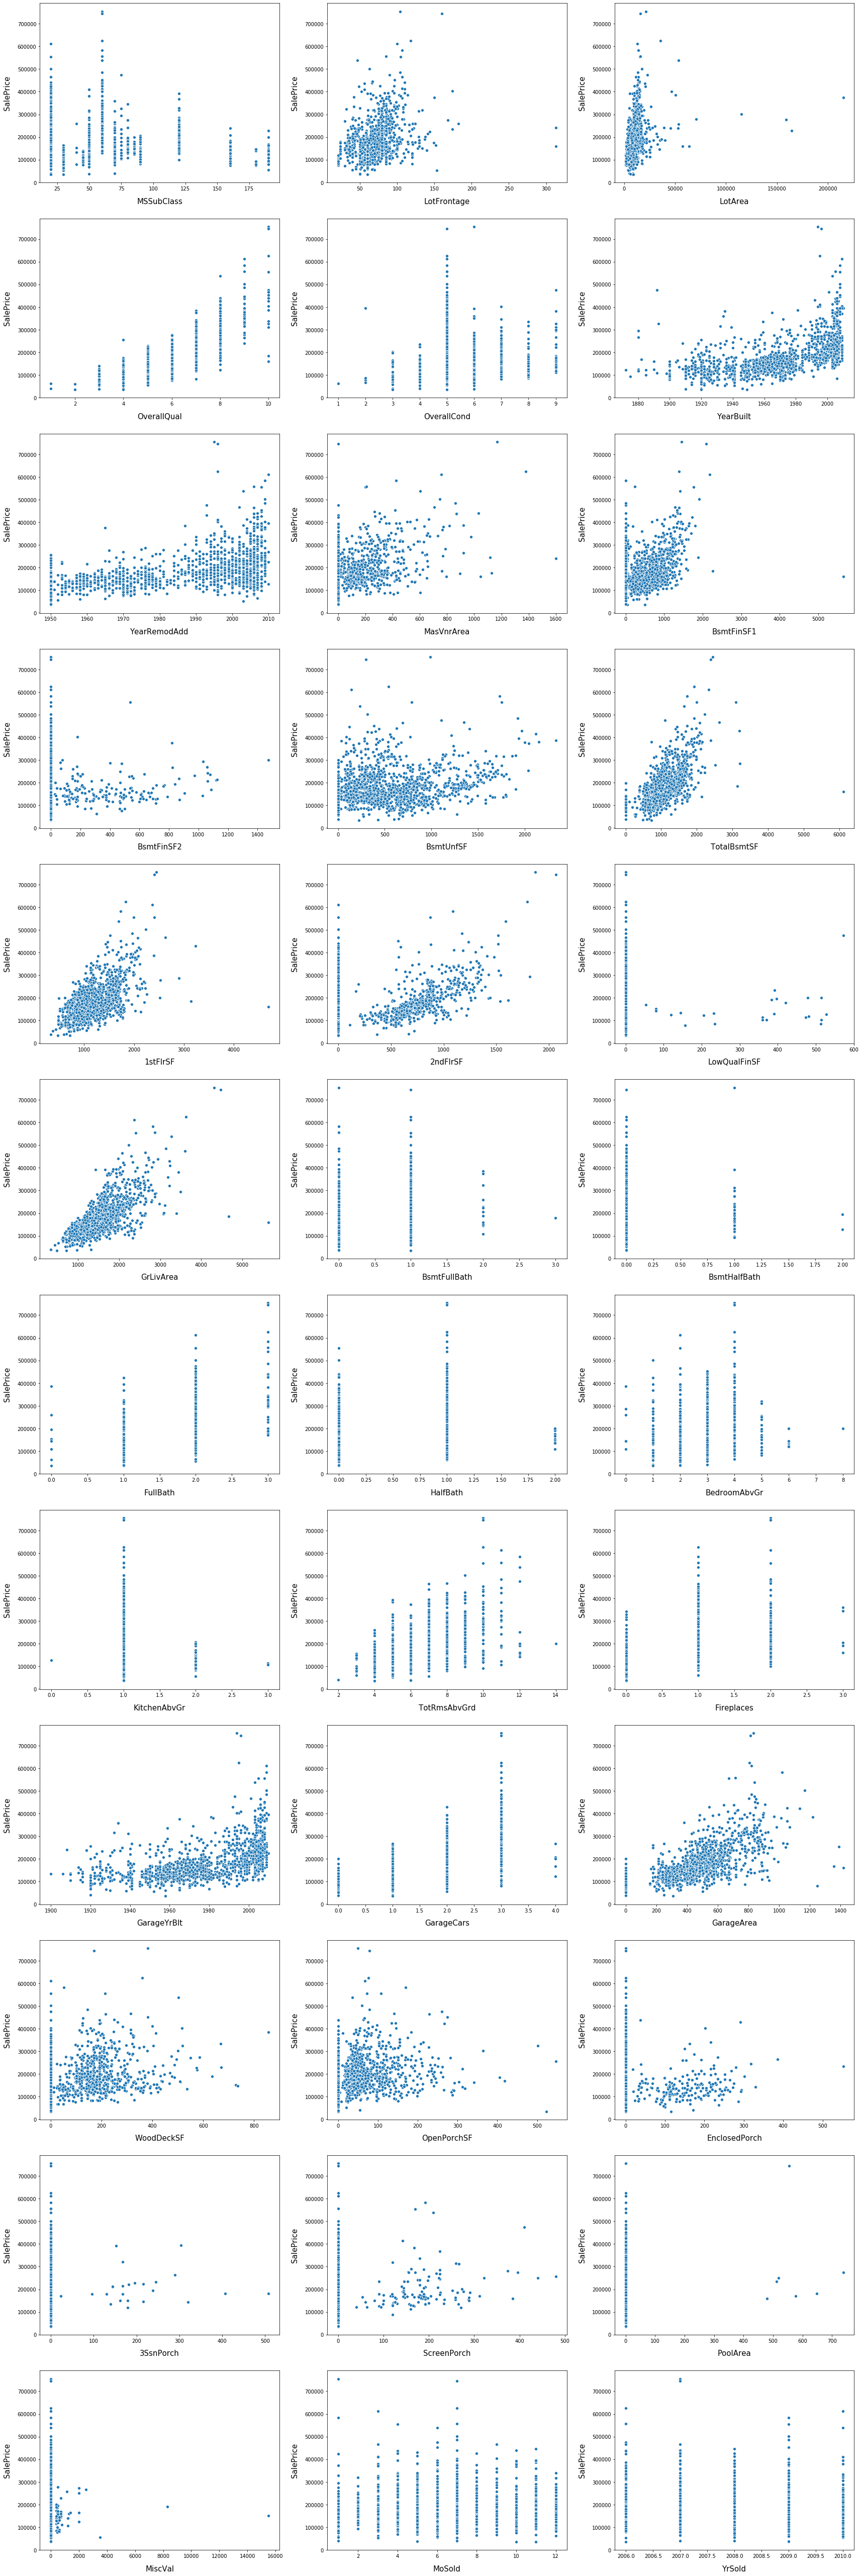

In [6]:
# Finding numeric features - excluding 'object' as we aalready know it is categorical
numeric_cols = raw_df.select_dtypes(exclude='object').columns
numeric_cols_length = len(numeric_cols)  

fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

# skiped Id and saleprice feature
for i in range(1,numeric_cols_length-1):
    feature = numeric_cols[i]
    plt.subplot(numeric_cols_length, 3, i)
    sns.scatterplot(x=feature, y='SalePrice', data=raw_df)
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
           
plt.show()

Observations:
MSSubClass,MoSold,YrSold - patterns shows it as a category and description meant the same
OverallQual, OverallCond - Ordered value (like ratings)
BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Fireplaces,BedroomAbvGr,KitchenAvbGr - discrete value(no. of bathrooms)

# Acessing overall data information 

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Investigating the size of the dataset (1640 rows, 81 columns)

In [8]:
raw_df.shape

(1460, 81)

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
raw_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
raw_df['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

# Data cleaning 

# Finding Missing Values 

In [12]:
raw_df.isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [13]:
raw_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [14]:
#missing data
total = raw_df.isnull().sum().sort_values(ascending=False)
percent = (raw_df.isnull().sum()/raw_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


# Drop variables which are missing exorbitant amounts of values

In [15]:
# drop PoolQC, MiscFeature, Alley, Fence, FireplaceQu, LotFrontage, missing data above 15%. 
drop_missing_df = raw_df
drop_missing_df.drop(["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "LotFrontage"], axis = 1, inplace = True)  

In [16]:
drop_missing_df.head(50)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000


In [17]:
drop_missing_df.drop(['Utilities'], axis = 1, inplace = True)

In [18]:
drop_missing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
MasVnrArea       1452 non-

In [19]:
drop_missing_df.shape

(1460, 74)

In [20]:
# print value counts for all 'objects' with more than 1 null value
def object_vcs_and_nulls(drop_missing_df):
  for i in drop_missing_df:
    if drop_missing_df[i].dtype == 'O':
      if drop_missing_df[i].isnull().sum() > 0:
        print(drop_missing_df[i].value_counts())  
        print("Number of Null Values: " + str(drop_missing_df[i].isnull().sum()))
        print("Percentage of Nulls = " + str(np.round((drop_missing_df[i].isnull().sum() / 14.60), 2)) + "%")
        print("\n")
      
object_vcs_and_nulls(drop_missing_df)

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
Number of Null Values: 8
Percentage of Nulls = 0.55%


TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
Number of Null Values: 37
Percentage of Nulls = 2.53%


TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
Number of Null Values: 37
Percentage of Nulls = 2.53%


No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Number of Null Values: 38
Percentage of Nulls = 2.6%


Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Number of Null Values: 37
Percentage of Nulls = 2.53%


Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Number of Null Values: 38
Percentage of Nulls = 2.6%


SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
Number of Null Values: 1
Percentage of Nulls = 0.07%


A

Most of missing values are in the categorical variables. 

# Replacing categorical missing values for median 

In [21]:
clean_df = drop_missing_df
clean_df['GarageCond'].replace(0, np.nan, inplace= True)

In [22]:
clean_df['GarageType'].replace(0, np.nan, inplace= True)

In [23]:
clean_df['GarageYrBlt'].replace(0, np.nan, inplace= True)

In [24]:
clean_df['GarageFinish'].replace(0, np.nan, inplace= True)

In [25]:
clean_df['BsmtQual'].replace(0, np.nan, inplace= True)

In [26]:
clean_df['BsmtCond'].replace(0, np.nan, inplace= True)

In [27]:
clean_df['BsmtExposure'].replace(0, np.nan, inplace= True)

In [28]:
 clean_df['BsmtFinType1'].replace(0, np.nan, inplace= True) 

In [29]:
 clean_df['BsmtFinType2'].replace(0, np.nan, inplace= True) 

In [30]:
median_value=clean_df['GarageYrBlt'].median()
clean_df['GarageYrBlt']=clean_df['GarageYrBlt'].fillna(median_value)

In [31]:
clean_df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [32]:
clean_df['GarageCond'] = clean_df['GarageCond'].astype('category').cat.codes

In [33]:
clean_df['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [34]:
clean_df['KitchenQual'] = clean_df['KitchenQual'].astype('category').cat.codes

In [35]:
clean_df['GarageType'] = clean_df['GarageType'].astype('category').cat.codes

In [36]:
clean_df['GarageFinish'] = clean_df['GarageFinish'].astype('category').cat.codes

In [37]:
clean_df['BsmtQual'] = clean_df['BsmtQual'].astype('category').cat.codes

In [38]:
clean_df['BsmtCond'] = clean_df['BsmtCond'].astype('category').cat.codes

In [39]:
clean_df['BsmtExposure'] = clean_df['BsmtExposure'].astype('category').cat.codes

In [40]:
clean_df['BsmtFinType1'] = clean_df['BsmtFinType1'].astype('category').cat.codes

In [41]:
clean_df['BsmtFinType2'] = clean_df['BsmtFinType2'].astype('category').cat.codes

In [42]:
median_value=clean_df['GarageCond'].median()
clean_df['GarageCond']=clean_df['GarageCond'].fillna(median_value)

In [43]:
median_value=clean_df['GarageType'].median()
clean_df['GarageType']=clean_df['GarageType'].fillna(median_value)

In [44]:
median_value=clean_df['GarageFinish'].median()
clean_df['GarageFinish']=clean_df['GarageFinish'].fillna(median_value)

In [45]:
median_value=clean_df['BsmtQual'].median()
clean_df['BsmtQual']=clean_df['BsmtQual'].fillna(median_value)

In [46]:
median_value=clean_df['BsmtCond'].median()
clean_df['BsmtCond']=clean_df['BsmtCond'].fillna(median_value)

In [47]:
median_value=clean_df['BsmtExposure'].median()
clean_df['BsmtExposure']=clean_df['BsmtExposure'].fillna(median_value)

In [48]:
median_value=clean_df['BsmtFinType1'].median()
clean_df['BsmtFinType1']=clean_df['BsmtFinType1'].fillna(median_value)

In [49]:
median_value=clean_df['BsmtFinType2'].median()
clean_df['BsmtFinType2']=clean_df['BsmtFinType2'].fillna(median_value)

# Double Checking for missing Values

In [50]:
clean_df.isna().any().any()

True

In [51]:
clean_df.isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 74, dtype: bool

In [52]:
clean_df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

# Removing duplicates 

In [53]:
def Remove(duplicate): 
    final_list = [drop_missing_df] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list 

# Double Checking for Duplicates

In [54]:
# Checking for duplicates in the id column
dups = drop_missing_df[drop_missing_df.duplicated(subset=['Id','SalePrice'], keep = 'last')]

In [55]:
dups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 74 columns):
Id               0 non-null int64
MSSubClass       0 non-null int64
MSZoning         0 non-null object
LotArea          0 non-null int64
Street           0 non-null object
LotShape         0 non-null object
LandContour      0 non-null object
LotConfig        0 non-null object
LandSlope        0 non-null object
Neighborhood     0 non-null object
Condition1       0 non-null object
Condition2       0 non-null object
BldgType         0 non-null object
HouseStyle       0 non-null object
OverallQual      0 non-null int64
OverallCond      0 non-null int64
YearBuilt        0 non-null int64
YearRemodAdd     0 non-null int64
RoofStyle        0 non-null object
RoofMatl         0 non-null object
Exterior1st      0 non-null object
Exterior2nd      0 non-null object
MasVnrType       0 non-null object
MasVnrArea       0 non-null float64
ExterQual        0 non-null object
ExterCond        0 non-null object
Fou

 # Declaring the Continuous and the Categorical variables

In [56]:
cat = ['MSSubclass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType',          
'HouseStyle', 'OverallCond','YearBuilt', 'YearRemodAdd', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 
'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive''KithcenAbvGr', 
'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']
con = ['OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SaleType', 'SaleCondition', 'SalePrice']       

 # Reset Index Values

In [57]:
drop_missing_df.reset_index(drop=True, inplace=True)

# EDA

In [58]:
#descriptive statistics summary
drop_missing_df['SalePrice'].describe().round(2)


count      1460.0
mean     180921.2
std       79442.5
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64

In [59]:
drop_missing_df['SalePrice'].median()

163000.0

# Checking for Muilticolinearity 

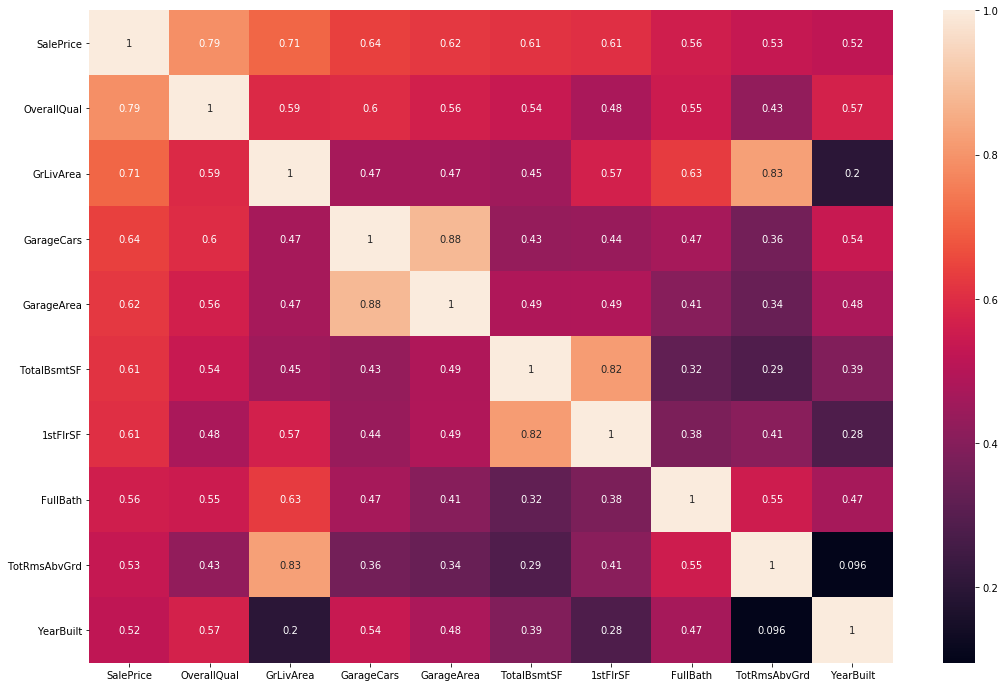

In [60]:
# Correlation of top 10 feature with saleprice
corWithSalePrice = clean_df.corr().nlargest(10,'SalePrice')['SalePrice'].index
f , ax = plt.subplots(figsize = (18,12))
ax = sns.heatmap(clean_df[corWithSalePrice].corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

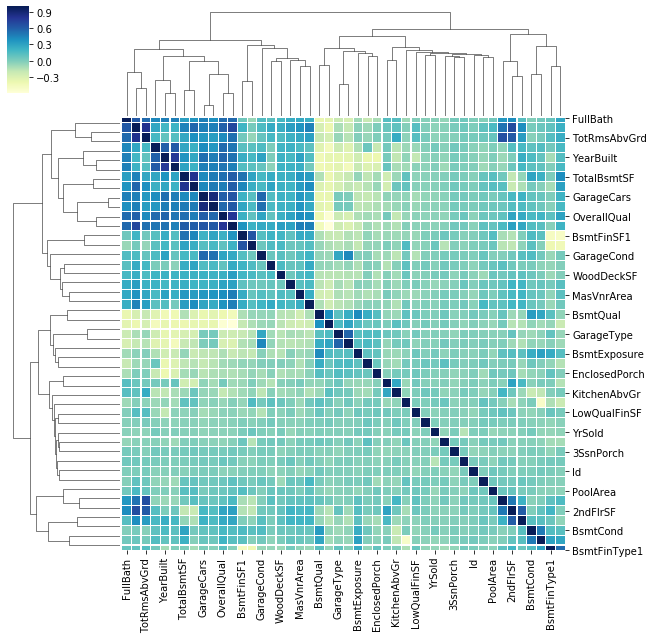

In [61]:
corrmat = clean_df.corr() 
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg

In [62]:
print(clean_df.corr())

                     Id  MSSubClass   LotArea  OverallQual  OverallCond  \
Id             1.000000    0.011156 -0.033226    -0.028365     0.012609   
MSSubClass     0.011156    1.000000 -0.139781     0.032628    -0.059316   
LotArea       -0.033226   -0.139781  1.000000     0.105806    -0.005636   
OverallQual   -0.028365    0.032628  0.105806     1.000000    -0.091932   
OverallCond    0.012609   -0.059316 -0.005636    -0.091932     1.000000   
YearBuilt     -0.012713    0.027850  0.014228     0.572323    -0.375983   
YearRemodAdd  -0.021998    0.040581  0.013788     0.550684     0.073741   
MasVnrArea    -0.050298    0.022936  0.104160     0.411876    -0.128101   
BsmtQual       0.047012   -0.045282 -0.043983    -0.387637     0.254683   
BsmtCond       0.008128   -0.021027  0.023134     0.185615     0.059735   
BsmtExposure  -0.021390   -0.066625 -0.119668    -0.118563     0.112043   
BsmtFinType1   0.015973    0.008407 -0.050162     0.115691    -0.043096   
BsmtFinSF1    -0.005024  

# Dropping strongly correlated variables in order to avoid confounding effects

In [63]:
# Correlation matrix
corr_matrix = clean_df.corr().abs()

In [64]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [65]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [66]:
to_drop

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

In [67]:
drop_missing_df.drop(['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)  

# Grouping Neighbourhoods by Mean and Median

In [68]:
drop_missing_df.groupby('Neighborhood', as_index=True)['SalePrice'].mean().round(2)

Neighborhood
Blmngtn    194870.88
Blueste    137500.00
BrDale     104493.75
BrkSide    124834.05
ClearCr    212565.43
CollgCr    197965.77
Crawfor    210624.73
Edwards    128219.70
Gilbert    192854.51
IDOTRR     100123.78
MeadowV     98576.47
Mitchel    156270.12
NAmes      145847.08
NPkVill    142694.44
NWAmes     189050.07
NoRidge    335295.32
NridgHt    316270.62
OldTown    128225.30
SWISU      142591.36
Sawyer     136793.14
SawyerW    186555.80
Somerst    225379.84
StoneBr    310499.00
Timber     242247.45
Veenker    238772.73
Name: SalePrice, dtype: float64

It is possible to argue that neighbourhood is an important factor when it comes to housing prices. MeadowV for example, presents the lowest prices in the sample, with  an average of US$98K Conversely, homes have the highest Mean prices in the sample (US£335K). 

# Using Median since there are outliers

In [69]:
drop_missing_df.groupby('Neighborhood', as_index=True)['SalePrice'].median()

Neighborhood
Blmngtn    191000
Blueste    137500
BrDale     106000
BrkSide    124300
ClearCr    200250
CollgCr    197200
Crawfor    200624
Edwards    121750
Gilbert    181000
IDOTRR     103000
MeadowV     88000
Mitchel    153500
NAmes      140000
NPkVill    146000
NWAmes     182900
NoRidge    301500
NridgHt    315000
OldTown    119000
SWISU      139500
Sawyer     135000
SawyerW    179900
Somerst    225500
StoneBr    278000
Timber     228475
Veenker    218000
Name: SalePrice, dtype: int64

Text(0.5, 1.0, 'Median Price for Sales by Neighborhood')

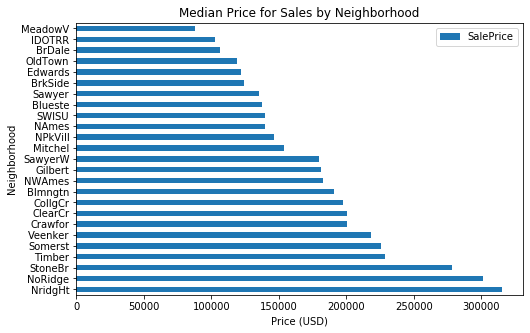

In [70]:
# plot median price by neighborhood
a = pd.DataFrame(clean_df.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending = False))
a.plot.barh(figsize = (8,5))
plt.xlabel('Price (USD)')
plt.title('Median Price for Sales by Neighborhood')

 The prices overall decreased across the whole sample, indicating that the outliers are on the high end of the pricing spectrum.

# Pricing per square footage

In [71]:
clean_df['TotalLivingSF'] = clean_df['GrLivArea'] + clean_df['TotalBsmtSF'] - clean_df['LowQualFinSF'].sort_values(ascending=False)

In [72]:
drop_missing_df.groupby('Neighborhood', as_index=True)['SalePrice'].mean() / drop_missing_df.groupby('Neighborhood', as_index=True)['TotalLivingSF'].mean().round(2)

Neighborhood
Blmngtn    70.801636
Blueste    67.700640
BrDale     60.503833
BrkSide    63.704169
ClearCr    70.917550
CollgCr    75.041327
Crawfor    74.769691
Edwards    57.244515
Gilbert    76.844568
IDOTRR     53.852575
MeadowV    57.569962
Mitchel    65.414001
NAmes      62.495803
NPkVill    65.273223
NWAmes     65.605482
NoRidge    83.769170
NridgHt    89.880761
OldTown    56.503345
SWISU      56.219783
Sawyer     62.675257
SawyerW    71.135539
Somerst    82.650266
StoneBr    91.267401
Timber     78.046402
Veenker    83.460412
dtype: float64

In [73]:
clean_df['TotalLivingSF'].mean()

2567.0486301369865

# Sales Figure 

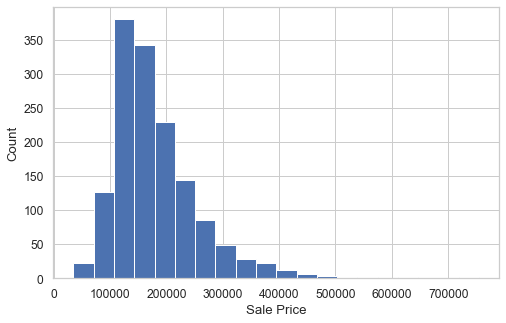

In [74]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(drop_missing_df['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

# Year Built

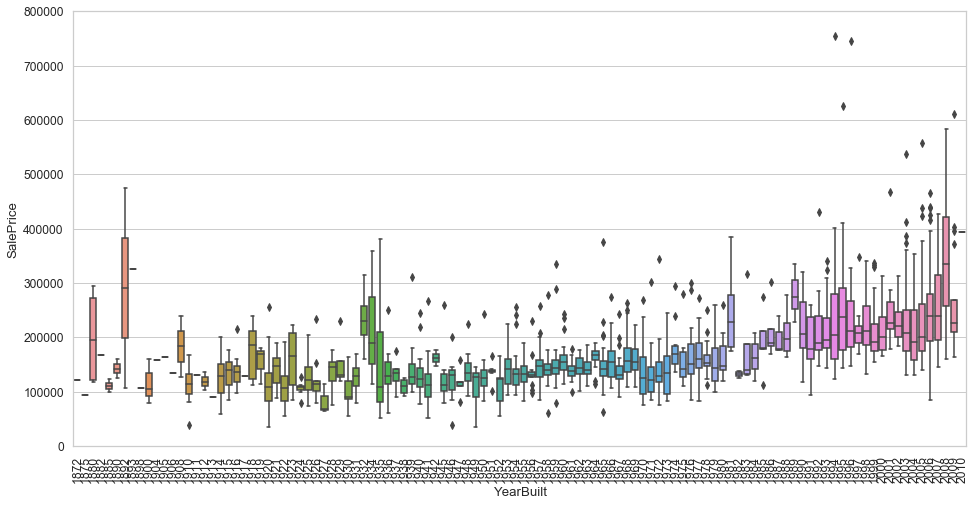

In [75]:
var = 'YearBuilt'
data = pd.concat([clean_df['SalePrice'], clean_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

# MSZoning 
As per data dictonary: MSZoning: Identifies the general zoning classification of the sale.

   A    Agriculture
   C    Commercial
   FV   Floating Village Residential
   I    Industrial
   RH   Residential High Density
   RL   Residential Low Density
   RP   Residential Low Density Park 
   RM   Residential Medium Density

([<matplotlib.axis.XTick at 0x1eea4c9ac48>,
 <a list of 5 Text xticklabel objects>)

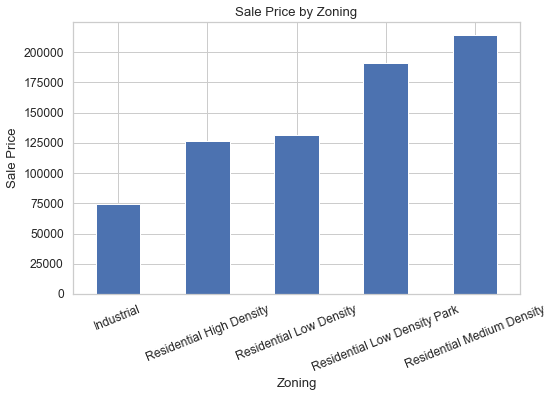

In [76]:
clean_df.groupby('MSZoning')['SalePrice'].mean().sort_values().plot(kind='bar')
plt.title('Sale Price by Zoning')
plt.xlabel('Zoning')
plt.ylabel('Sale Price')
plt.xticks(range(5), ['Industrial', 'Residential High Density', 'Residential Low Density', 'Residential Low Density Park', 'Residential Medium Density'], rotation = 22)

# Exploring the potential for renovation 

# Kitchen 

In [77]:
clean_df.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0       Inside       Gtl      C

In [78]:
clean_df.shape

(1460, 72)

In [79]:
main_df = pd.read_csv('Housing_prices_data.csv', verbose=True, keep_default_na=False)
#keep NA as NA, not np.nan values

Tokenization took: 6.97 ms
Type conversion took: 5.99 ms
Parser memory cleanup took: 0.00 ms


In [80]:
renovation = ['OverallQual', 'OverallCond', 'RoofMatl', 'RoofStyle',
               'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtFinType1',
               'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
               'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
               'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
               'PoolQC', 'SalePrice']

renovation_df = main_df[renovation]

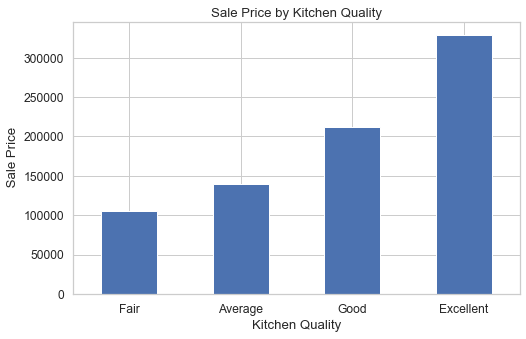

In [81]:
renovation_df.groupby('KitchenQual')['SalePrice'].mean().sort_values().plot(kind='bar')
plt.title('Sale Price by Kitchen Quality')
plt.xlabel('Kitchen Quality')
plt.ylabel(' Sale Price')
plt.xticks(range(4), ['Fair', 'Average', 'Good', 'Excellent'], rotation = 0);

In [82]:
renovation_df.groupby('KitchenQual')['SalePrice'].mean().sort_values().round(2)

KitchenQual
Fa    105565.21
TA    139962.51
Gd    212116.02
Ex    328554.67
Name: SalePrice, dtype: float64

# Roof Materials and Quality

In [83]:
renovation_df['RoofMatl'].unique()

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

([<matplotlib.axis.XTick at 0x1eea4067c88>,
 <a list of 8 Text xticklabel objects>)

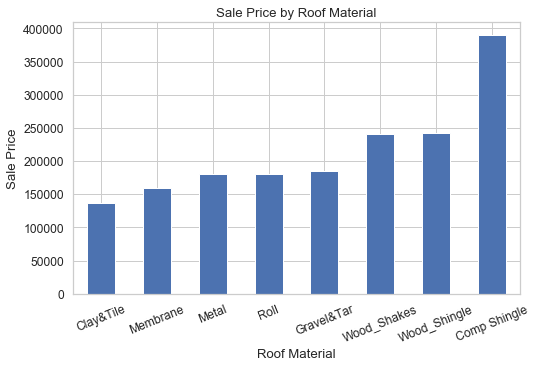

In [84]:
renovation_df.groupby('RoofMatl')['SalePrice'].mean().sort_values().plot(kind='bar')
plt.title('Sale Price by Roof Material')
plt.xlabel('Roof Material')
plt.ylabel('Sale Price')
plt.xticks(range(8), ['Clay&Tile', 'Membrane', 'Metal', 'Roll', 
                      'Gravel&Tar', 'Wood_Shakes', 'Wood_Shingle', 'Comp Shingle'], rotation = 22)

In [85]:
renovation_df.groupby('RoofMatl')['SalePrice'].mean().sort_values().round(2)

RoofMatl
Roll       137000.00
ClyTile    160000.00
CompShg    179803.68
Metal      180000.00
Tar&Grv    185406.36
WdShake    241400.00
Membran    241500.00
WdShngl    390250.00
Name: SalePrice, dtype: float64

In [86]:
renovation_df['RoofStyle'].unique()

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

([<matplotlib.axis.XTick at 0x1eea40e5508>,
 <a list of 6 Text xticklabel objects>)

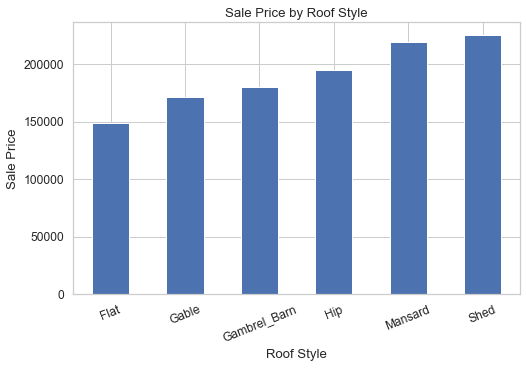

In [87]:
renovation_df.groupby('RoofStyle')['SalePrice'].mean().sort_values().plot(kind='bar')
plt.title('Sale Price by Roof Style')
plt.xlabel('Roof Style')
plt.ylabel('Sale Price')
plt.xticks(range(6), ['Flat', 'Gable', 'Gambrel_Barn', 'Hip', 'Mansard', 'Shed'], rotation = 22)

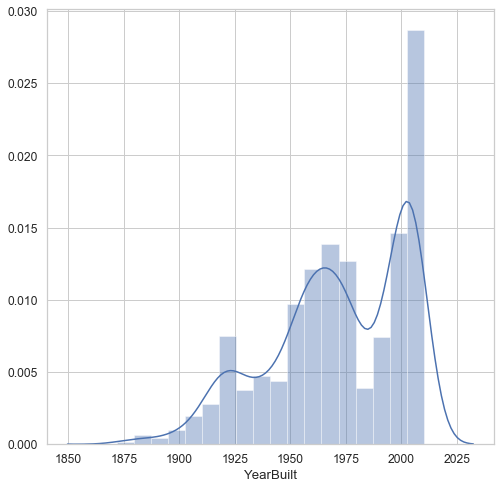

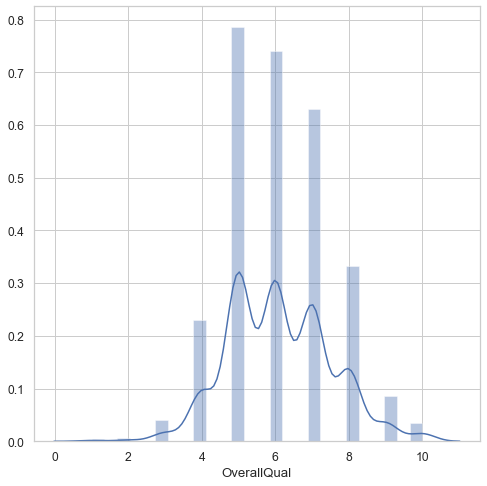

In [88]:
#looking at the distribubtion of properties base on year built and overall quality 

plt.figure(figsize = (8,8))
ax = sns.distplot(clean_df['YearBuilt'])
plt.figure(figsize = (8,8))
ax = sns.distplot(clean_df['OverallQual'])

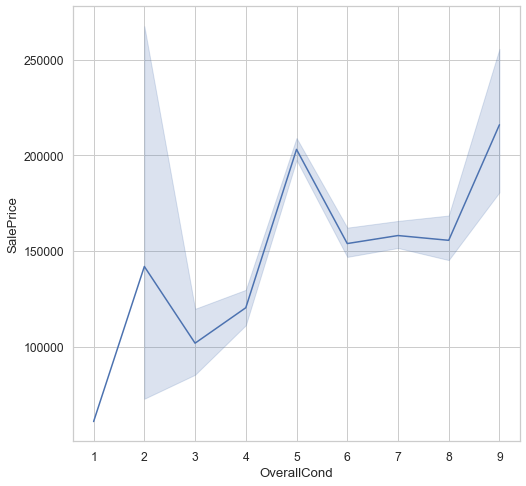

In [89]:
#comparing whether the price increases with overall condition 
plt.figure(figsize = (8,8))
ax= sns.lineplot(clean_df['OverallCond'], clean_df['SalePrice'])

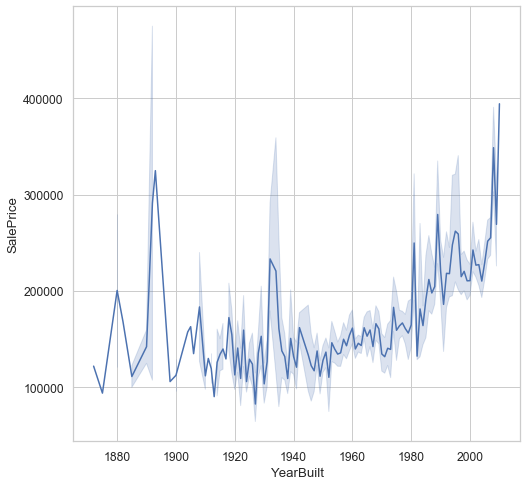

In [90]:
#comparing whether the price increases with Year Built 
plt.figure(figsize = (8,8))
ax= sns.lineplot(clean_df['YearBuilt'], clean_df['SalePrice'])

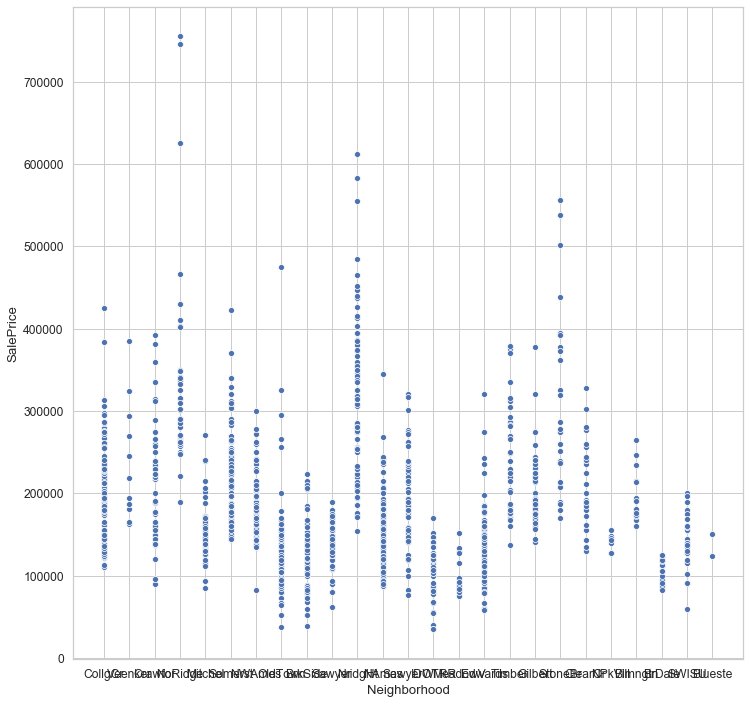

In [125]:
#checking if year built has any effect on price. 
plt.figure(figsize = (12,12))
ax= sns.scatterplot(clean_df['Neighborhood'],clean_df['SalePrice'])

In [92]:
clean_df.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0       Inside       Gtl      C

# Creating Subsets

Initially, we sorted our dataframe in descending order of price, afterwhich we created a subset of the 500 most expensive properties.

In [93]:
most_expensive_df = clean_df.sort_values('SalePrice', ascending = False)

In [94]:
most_expensive_500 = most_expensive_df.iloc[0:500]

In [95]:
most_expensive_500.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalLivingSF
691,692,60,RL,21535,Pave,IR1,Lvl,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,0,3,1,2,1455,5,0,989,2444,GasA,Ex,Y,SBrkr,1872,0,4316,0,1,3,1,4,1,0,Typ,2,1,1994.0,0,3,TA,4,Y,382,50,0,0,0,0,0,1,2007,WD,Normal,755000,6760
1182,1183,60,RL,15623,Pave,IR1,Lvl,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,0,3,0,2,2096,5,0,300,2396,GasA,Ex,Y,SBrkr,2065,0,4476,1,0,3,1,4,1,0,Typ,2,1,1996.0,0,3,TA,4,Y,171,78,0,0,0,555,0,7,2007,WD,Abnorml,745000,6872
1169,1170,60,RL,35760,Pave,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,0,3,1,2,1387,5,0,543,1930,GasA,Ex,Y,SBrkr,1796,0,3627,1,0,3,1,4,1,2,Typ,1,1,1995.0,0,3,TA,4,Y,361,76,0,0,0,0,0,7,2006,WD,Normal,625000,5557
898,899,20,RL,12919,Pave,IR1,Lvl,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,0,3,1,2,2188,5,0,142,2330,GasA,Ex,Y,SBrkr,0,0,2364,1,0,2,1,2,1,0,Typ,2,1,2009.0,0,3,TA,4,Y,0,67,0,0,0,0,0,3,2010,New,Partial,611657,4694
803,804,60,RL,13891,Pave,Reg,Lvl,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,0,3,1,5,0,5,0,1734,1734,GasA,Ex,Y,SBrkr,1088,0,2822,0,0,3,1,4,1,0,Typ,1,3,2009.0,1,3,TA,4,Y,52,170,0,0,192,0,0,1,2009,New,Partial,582933,4556


In [96]:
most_expensive_500.tail()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalLivingSF
739,740,60,RL,9313,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,2,3,3,5,0,5,0,864,864,GasA,Ex,Y,SBrkr,864,0,1728,0,0,2,1,3,1,2,Typ,0,1,2004.0,1,2,TA,4,Y,187,56,0,0,0,0,0,4,2009,WD,Normal,190000,2592
860,861,50,RL,7642,Pave,Reg,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,7,8,1918,1998,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,BrkTil,3,3,3,5,0,5,0,912,912,GasA,Gd,Y,SBrkr,514,0,1426,0,0,1,1,3,1,2,Typ,1,5,1925.0,2,1,TA,4,Y,0,240,0,0,0,0,0,6,2007,WD,Normal,189950,2338
1360,1361,70,RL,9842,Pave,Reg,Lvl,Inside,Gtl,SWISU,Feedr,Norm,1Fam,2Story,5,6,1921,1998,Gable,CompShg,MetalSd,Wd Sdng,None,0.0,TA,TA,BrkTil,3,0,3,5,0,5,0,612,612,GasA,Ex,Y,SBrkr,1611,0,2601,0,0,3,1,4,1,3,Typ,0,3,1998.0,1,2,TA,4,Y,183,0,301,0,0,0,0,5,2008,WD,Normal,189000,3213
1189,1190,60,RL,7500,Pave,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,3,3,3,5,0,5,0,994,994,GasA,Gd,Y,SBrkr,776,0,1804,0,0,2,1,3,1,2,Typ,1,1,1999.0,0,2,TA,4,Y,140,60,0,0,0,0,0,6,2010,WD,Normal,189000,2798
827,828,20,RL,8529,Pave,IR1,Lvl,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,2,3,3,2,20,5,0,1434,1454,GasA,Ex,Y,SBrkr,0,0,1434,0,0,2,0,3,1,2,Typ,1,1,2001.0,1,2,TA,4,Y,290,39,0,0,0,0,0,4,2009,WD,Normal,189000,2888


In [97]:
#descriptive statistics summary
most_expensive_500['SalePrice'].describe().round(2)

count       500.00
mean     264271.44
std       77676.86
min      189000.00
25%      212675.00
50%      240000.00
75%      290000.00
max      755000.00
Name: SalePrice, dtype: float64

In [98]:
most_expensive_500.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
691    692          60       RL    21535   Pave      IR1         Lvl   
1182  1183          60       RL    15623   Pave      IR1         Lvl   
1169  1170          60       RL    35760   Pave      IR1         Lvl   
898    899          20       RL    12919   Pave      IR1         Lvl   
803    804          60       RL    13891   Pave      Reg         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
739    740          60       RL     9313   Pave      IR1         Lvl   
860    861          50       RL     7642   Pave      Reg         Lvl   
1360  1361          70       RL     9842   Pave      Reg         Lvl   
1189  1190          60       RL     7500   Pave      Reg         Lvl   
827    828          20       RL     8529   Pave      IR1         Lvl   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
691     Corner       Gtl      N

In [99]:
#We are subtracting the 2000 most expensive properties from the main dataframe in order to create a sample set
df_minus500 = clean_df.drop(most_expensive_500.index, axis=0)
df_minus500.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalLivingSF
1,2,20,RL,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,2,3,1,0,978,5,0,284,1262,GasA,Ex,Y,SBrkr,0,0,1262,0,1,2,0,3,1,3,Typ,1,1,1976.0,1,2,TA,4,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,2524
3,4,70,RL,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,3,1,3,0,216,5,0,540,756,GasA,Gd,Y,SBrkr,756,0,1717,1,0,1,0,3,1,2,Typ,1,5,1998.0,2,3,TA,4,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,2473
5,6,50,RL,14115,Pave,IR1,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,2,3,3,2,732,5,0,64,796,GasA,Ex,Y,SBrkr,566,0,1362,1,0,1,1,1,1,3,Typ,0,1,1993.0,2,2,TA,4,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000,2158
8,9,50,RM,6120,Pave,Reg,Lvl,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,3,3,3,5,0,5,0,952,952,GasA,Gd,Y,FuseF,752,0,1774,0,0,2,0,2,2,3,Min1,2,5,1931.0,2,2,Fa,4,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900,2726
9,10,190,RL,7420,Pave,Reg,Lvl,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,3,3,3,2,851,5,0,140,991,GasA,Ex,Y,SBrkr,0,0,1077,1,0,1,0,2,2,3,Typ,2,1,1939.0,1,1,Gd,4,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000,2068


In [100]:
df_sample500 = df_minus500.sample(n=500, random_state = 6)
df_sample500.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalLivingSF
160,161,20,RL,11120,Pave,IR1,Lvl,CulDSac,Gtl,Veenker,Norm,Norm,1Fam,1Story,6,6,1984,1984,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,PConc,2,3,3,1,660,5,0,572,1232,GasA,TA,Y,SBrkr,0,0,1232,0,0,2,0,3,1,3,Typ,0,1,1984.0,2,2,TA,4,Y,0,0,0,0,0,0,0,6,2008,WD,Normal,162500,2464
381,382,20,FV,7200,Pave,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,2,1,3,5,0,5,0,1293,1293,GasA,Ex,Y,SBrkr,0,0,1301,1,0,2,0,2,1,2,Typ,1,1,2006.0,1,2,TA,4,Y,216,121,0,0,0,0,0,8,2006,New,Partial,187750,2594
913,914,90,RH,6270,Pave,Reg,HLS,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,1949,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,3,3,3,1,284,5,0,717,1001,GasA,TA,N,FuseA,1001,0,2002,0,0,2,0,4,2,3,Typ,0,0,1949.0,2,3,TA,4,Y,0,0,0,0,0,0,0,8,2007,WD,Normal,145000,3003
592,593,20,RL,6600,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,8,1982,2003,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,3,1,3,2,816,5,0,0,816,GasA,Ex,Y,SBrkr,0,0,816,1,0,1,0,2,1,3,Typ,0,5,1985.0,0,2,TA,4,Y,0,0,0,0,0,0,0,6,2008,WD,Normal,138000,1632
911,912,20,RL,9286,Pave,IR1,Lvl,CulDSac,Mod,CollgCr,Norm,Norm,1Fam,1Story,5,7,1977,1989,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,2,1,0,0,196,5,0,1072,1268,GasA,TA,Y,SBrkr,0,0,1268,0,0,1,1,3,1,2,Typ,0,5,1978.0,2,1,TA,4,Y,173,0,0,0,0,0,0,10,2009,WD,Normal,143500,2536


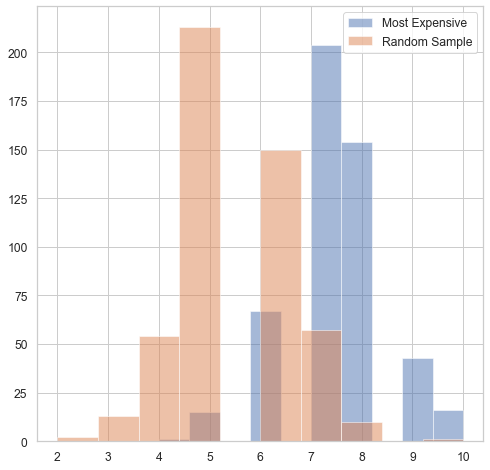

In [101]:
#comparing OverallQual of the most expensive properties and the random sample. Clearly the most expensive properties 
# a larger living areas even though there is a slight overlap.

plt.figure(figsize = (8,8))
ax= plt.hist(most_expensive_500['OverallQual'], alpha = 0.5, label = 'Most Expensive')
ax2 = plt.hist(df_sample500['OverallQual'], alpha = 0.5, label = 'Random Sample')
plt.legend()

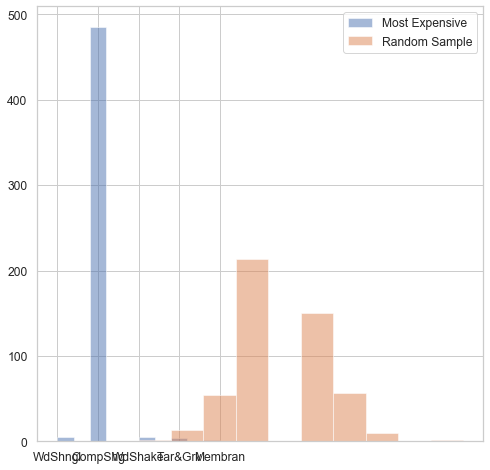

In [102]:
plt.figure(figsize = (8,8))
ax= plt.hist(most_expensive_500['RoofMatl'], alpha = 0.5, label = 'Most Expensive')
ax2 = plt.hist(df_sample500['OverallQual'], alpha = 0.5, label = 'Random Sample')
plt.legend()

In [103]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings(action="ignore")

In [104]:
import numpy as np

# Lot Area

In [105]:
SalePrice_LotArea = 'SalePrice ~ LotArea'
model = ols(SalePrice_LotArea, data = clean_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     109.1
Date:                Wed, 22 Jan 2020   Prob (F-statistic):           1.12e-24
Time:                        12:11:23   Log-Likelihood:                -18491.
No. Observations:                1460   AIC:                         3.699e+04
Df Residuals:                    1458   BIC:                         3.700e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.588e+05   2914.717     54.495      0.000    1.53e+05    1.65e+05
LotArea        2.1000      0.201     10.445      0.000       1.706       2.494
==============================================================================
Omnibus:                      587.660   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3374.003
Skew:                           1.788   Prob(JB):                         0.00
Kurtosis:                       9.532   Cond. No.                     2.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Question 1 - Model 

In [106]:
# checking our scatter matrix prior to logging SalePrice and OverallQual
outcome = 'SalePrice'
x_cols = ['MSZoning', 'Neighborhood']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=clean_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     63.12
Date:                Wed, 22 Jan 2020   Prob (F-statistic):          1.32e-226
Time:                        12:11:23   Log-Likelihood:                -17957.
No. Observations:                1460   AIC:                         3.597e+04
Df Residuals:                    1431   BIC:                         3.613e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.535e+05   2.41e+04      6.365      0.000    1.06e+05    2.01e+05
MSZoning[T.FV]          -4831.0708   2.45e+04     -0.197      0.844   -5.28e+04    4.32e+04
MSZoning[T.RH]           6279.2586   2.48e+04      0.253      0.800   -4.24e+04    5.49e+04
MSZoning[T.RL]           4.171e+04   2.04e+04      2.041      0.041    1620.216    8.18e+04
MSZoning[T.RM]            3.63e+04   1.92e+04      1.890      0.059   -1378.801     7.4e+04
Neighborhood[T.Blueste] -5.228e+04   4.07e+04     -1.286      0.199   -1.32e+05    2.75e+04
Neighborhood[T.BrDale]  -8.529e+04   1.99e+04     -4.296      0.000   -1.24e+05   -4.63e+04
Neighborhood[T.BrkSide] -6.756e+04   1.52e+04     -4.458      0.000   -9.73e+04   -3.78e+04
Neighborhood[T.ClearCr]  1.738e+04   1.65e+04      1.053      0.293    -1.5e+04    4.97e+04
Neighborhood[T.CollgCr]  3137.3231   1.37e+04      0.228      0.819   -2.38e+04    3.01e+04
Neighborhood[T.Crawfor]  1.714e+04    1.5e+04      1.140      0.254   -1.24e+04    4.66e+04
Neighborhood[T.Edwards] -6.583e+04   1.41e+04     -4.675      0.000   -9.34e+04   -3.82e+04
Neighborhood[T.Gilbert] -2334.6170   1.44e+04     -0.163      0.871   -3.05e+04    2.58e+04
Neighborhood[T.IDOTRR]  -8.082e+04   1.77e+04     -4.565      0.000   -1.16e+05   -4.61e+04
Neighborhood[T.MeadowV]  -9.12e+04   1.96e+04     -4.657      0.000    -1.3e+05   -5.28e+04
Neighborhood[T.Mitchel] -3.837e+04   1.51e+04     -2.540      0.011    -6.8e+04   -8733.784
Neighborhood[T.NAmes]   -4.903e+04   1.35e+04     -3.631      0.000   -7.55e+04   -2.25e+04
Neighborhood[T.NPkVill] -5.249e+04   2.21e+04     -2.373      0.018   -9.59e+04   -9097.922
Neighborhood[T.NWAmes]  -6139.0548   1.45e+04     -0.425      0.671   -3.45e+04    2.22e+04
Neighborhood[T.NoRidge]  1.401e+05   1.55e+04      9.049      0.000     1.1e+05     1.7e+05
Neighborhood[T.NridgHt]  1.212e+05   1.44e+04      8.424      0.000    9.29e+04    1.49e+05
Neighborhood[T.OldTown] -6.205e+04   1.51e+04     -4.122      0.000   -9.16e+04   -3.25e+04
Neighborhood[T.SWISU]   -4.551e+04   1.71e+04     -2.660      0.008   -7.91e+04    -1.2e+04
Neighborhood[T.Sawyer]  -5.825e+04   1.44e+04     -4.036      0.000   -8.66e+04   -2.99e+04
Neighborhood[T.SawyerW] -5630.3413   1.48e+04     -0.380      0.704   -3.47e+04    2.34e+04
Neighborhood[T.Somerst]  6.537e+04   1.75e+04      3.733      0.000     3.1e+04    9.97e+04
Neighborhood[T.StoneBr]  1.153e+05   1.69e+04      6.834      0.000    8.22e+04    1.48e+05
Neighborhood[T.Timber]   4.706e+04   1.57e+04      3.005      0.003    1.63e+04    7.78e+04
Neighborhood[T.Veenker]  4.358e+04   2.08e+04      2.099      0.036    2846.981    8.43e+04
==============================================================================
Omnibus:                      634.046   Durbin-Watson:      

# Question 2 - Model 

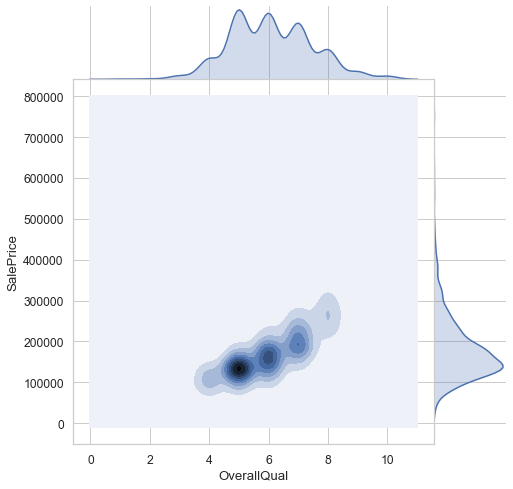

In [107]:
x1 = clean_df.OverallQual
x2 = clean_df.SalePrice

# Showing the joint distribution using kernel density estimation
g = sns.jointplot(x1, x2, kind="kde", height=7, space=0)


In [108]:
outcome = 'SalePrice'
x_cols = ['OverallQual', 'OverallCond']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=clean_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     1218.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):          1.28e-311
Time:                        12:11:25   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1457   BIC:                         3.568e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.398e+04   9006.458    -10.434      0.000   -1.12e+05   -7.63e+04
OverallQual  4.541e+04    924.629     49.110      0.000    4.36e+04    4.72e+04
OverallCond  -370.0065   1149.137     -0.322      0.748   -2624.146    1884.132
==============================================================================
Omnibus:                      591.452   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5871.154
Skew:                           1.606   Prob(JB):                         0.00
Kurtosis:                      12.284   Cond. No.                         59.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

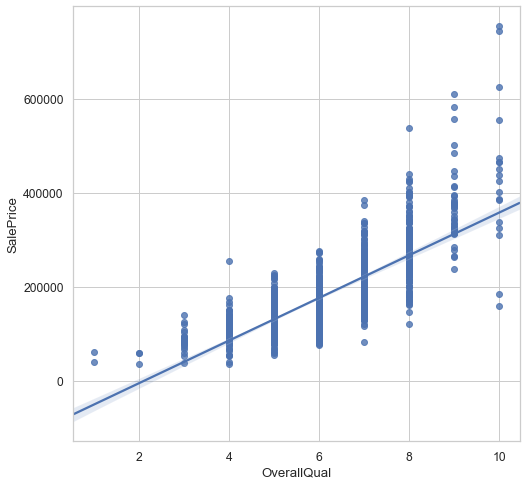

In [109]:
plt.figure(figsize = (8,8))
ax= sns.regplot(clean_df['OverallQual'], clean_df['SalePrice'])

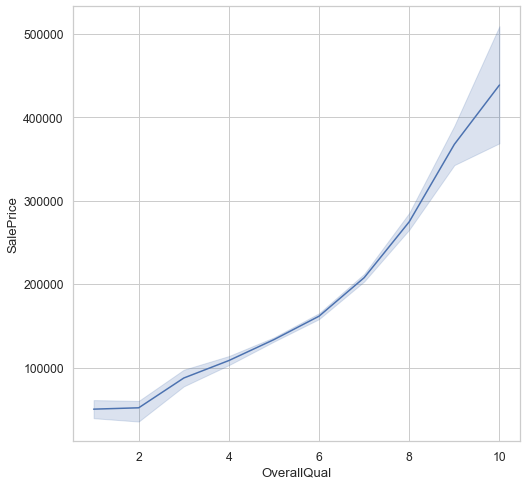

In [110]:
#comparing whether the price increases with overall quality 
plt.figure(figsize = (8,8))
ax= sns.lineplot(clean_df['OverallQual'], clean_df['SalePrice'])

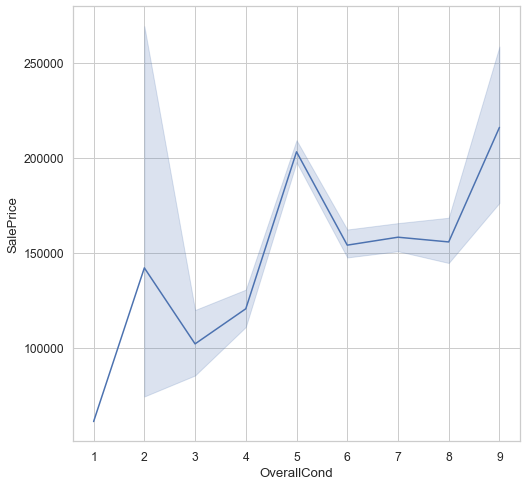

In [111]:
#comparing whether the price increases with overall condition 
plt.figure(figsize = (8,8))
ax= sns.lineplot(clean_df['OverallCond'], clean_df['SalePrice'])

# Question 3 

In [112]:
clean_df.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0       Inside       Gtl      C

In [113]:
outcome = 'SalePrice'
x_cols = ['KitchenQual', 'Fireplaces', 'GrLivArea']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=clean_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     861.2
Date:                Wed, 22 Jan 2020   Prob (F-statistic):          5.58e-322
Time:                        12:11:26   Log-Likelihood:                -17799.
No. Observations:                1460   AIC:                         3.561e+04
Df Residuals:                    1456   BIC:                         3.563e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.365e+05   6533.040     20.889      0.000    1.24e+05    1.49e+05
KitchenQual -3.481e+04   1632.175    -21.328      0.000    -3.8e+04   -3.16e+04
Fireplaces   1.894e+04   2190.111      8.646      0.000    1.46e+04    2.32e+04
GrLivArea      75.4168      2.830     26.646      0.000      69.865      80.969
==============================================================================
Omnibus:                      286.742   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7006.107
Skew:                          -0.205   Prob(JB):                         0.00
Kurtosis:                      13.724   Cond. No.                     8.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
outcome = 'SalePrice'
x_cols = ['GarageType ', 'GarageFinish', 'GarageCars', 'PavedDrive', 'Functional']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=clean_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     137.6
Date:                Wed, 22 Jan 2020   Prob (F-statistic):          6.48e-216
Time:                        12:11:27   Log-Likelihood:                -18022.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1448   BIC:                         3.613e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           6.486e+04   1.62e+04      4.016      0.000    3.32e+04    9.65e+04
PavedDrive[T.P]      1.94e+04   1.19e+04      1.634      0.103   -3895.173    4.27e+04
PavedDrive[T.Y]     1.916e+04   6414.458      2.987      0.003    6575.935    3.17e+04
Functional[T.Maj2] -2.036e+04   2.91e+04     -0.699      0.485   -7.75e+04    3.68e+04
Functional[T.Min1] -1745.9170    1.8e+04     -0.097      0.923    -3.7e+04    3.36e+04
Functional[T.Min2]  1069.2454   1.77e+04      0.060      0.952   -3.37e+04    3.58e+04
Functional[T.Mod]   2.139e+04   2.08e+04      1.029      0.303   -1.94e+04    6.21e+04
Functional[T.Sev]  -3.092e+04   5.77e+04     -0.535      0.592   -1.44e+05    8.24e+04
Functional[T.Typ]   1.136e+04    1.5e+04      0.757      0.449   -1.81e+04    4.08e+04
GarageType         -4024.7751    962.160     -4.183      0.000   -5912.151   -2137.399
GarageFinish       -2.063e+04   1948.906    -10.583      0.000   -2.44e+04   -1.68e+04
GarageCars          6.662e+04   2051.331     32.478      0.000    6.26e+04    7.06e+04
==============================================================================
Omnibus:                      667.024   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6966.944
Skew:                           1.853   Prob(JB):                         0.00
Kurtosis:                      13.039   Cond. No.                         150.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
outcome = 'SalePrice'
x_cols = ['RoofStyle ', 'RoofMatl']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=clean_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     11.73
Date:                Wed, 22 Jan 2020   Prob (F-statistic):           6.83e-23
Time:                        12:11:27   Log-Likelihood:                -18476.
No. Observations:                1460   AIC:                         3.698e+04
Df Residuals:                    1447   BIC:                         3.705e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              1.57e+05   9.41e+04      1.668      0.095   -2.76e+04    3.42e+05
RoofStyle[T.Gable]   -4.442e+04   5.51e+04     -0.806      0.421   -1.53e+05    6.37e+04
RoofStyle[T.Gambrel] -6.612e+04   5.97e+04     -1.107      0.268   -1.83e+05     5.1e+04
RoofStyle[T.Hip]      2984.2166   5.53e+04      0.054      0.957   -1.06e+05    1.11e+05
RoofStyle[T.Mansard]  -4.79e+04   6.32e+04     -0.758      0.448   -1.72e+05     7.6e+04
RoofStyle[T.Shed]    -1.355e+04   7.94e+04     -0.171      0.865   -1.69e+05    1.42e+05
RoofMatl[T.CompShg]   5.801e+04   7.63e+04      0.760      0.447   -9.16e+04    2.08e+05
RoofMatl[T.Membran]   8.448e+04   1.21e+05      0.698      0.485   -1.53e+05    3.22e+05
RoofMatl[T.Metal]     2.298e+04   1.21e+05      0.190      0.849   -2.15e+05     2.6e+05
RoofMatl[T.Roll]       2.44e+04   1.08e+05      0.226      0.821   -1.87e+05    2.36e+05
RoofMatl[T.Tar&Grv]   3.243e+04   9.41e+04      0.345      0.730   -1.52e+05    2.17e+05
RoofMatl[T.WdShake]   1.051e+05   8.53e+04      1.231      0.218   -6.23e+04    2.72e+05
RoofMatl[T.WdShngl]   2.698e+05   8.24e+04      3.275      0.001    1.08e+05    4.31e+05
==============================================================================
Omnibus:                      443.786   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1626.866
Skew:                           1.451   Prob(JB):                         0.00
Kurtosis:                       7.280   Cond. No.                         198.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

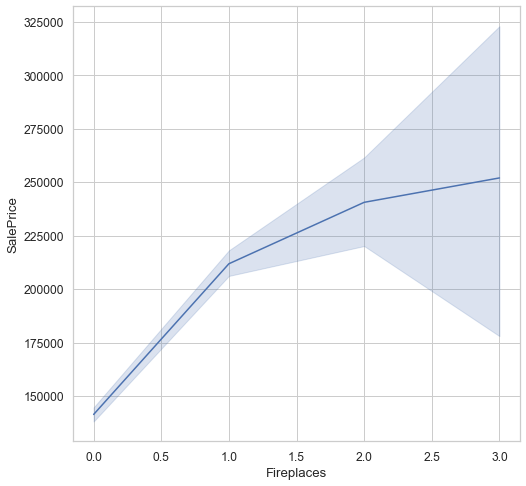

In [116]:
plt.figure(figsize = (8,8))
ax= sns.lineplot(clean_df['Fireplaces'], clean_df['SalePrice'])

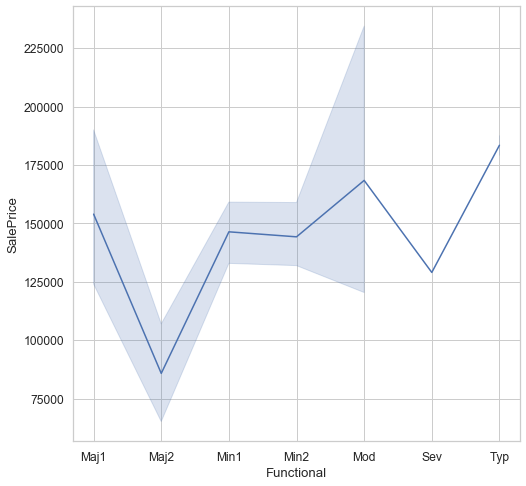

In [117]:
plt.figure(figsize = (8,8))
ax= sns.lineplot(clean_df['Functional'], clean_df['SalePrice'])

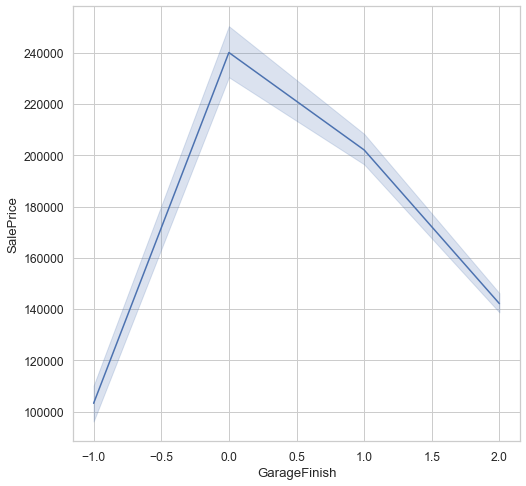

In [118]:
plt.figure(figsize = (8,8))
ax= sns.lineplot(clean_df['GarageFinish'], clean_df['SalePrice'])

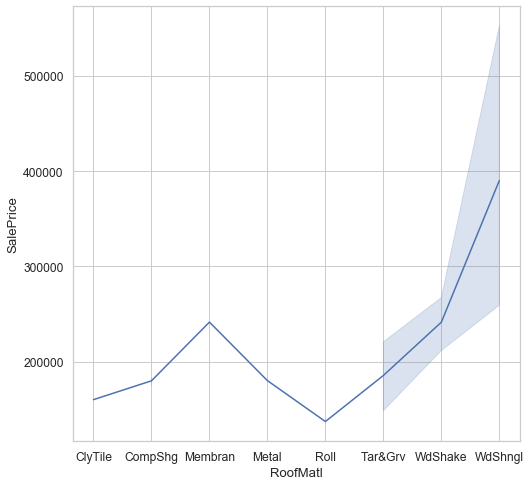

In [119]:
plt.figure(figsize = (8,8))
ax= sns.lineplot(clean_df['RoofMatl'], clean_df['SalePrice'])

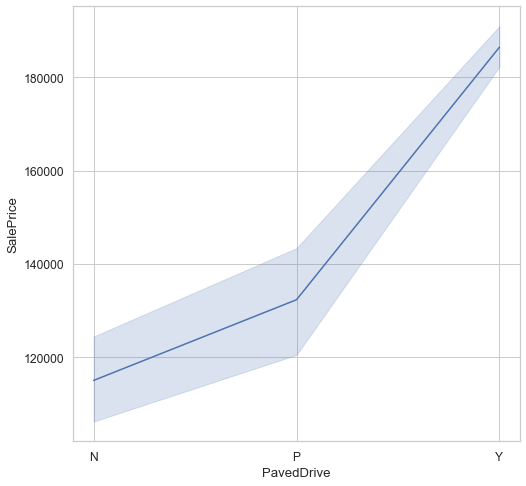

In [120]:
plt.figure(figsize = (8,8))
ax= sns.lineplot(clean_df['PavedDrive'], clean_df['SalePrice'])

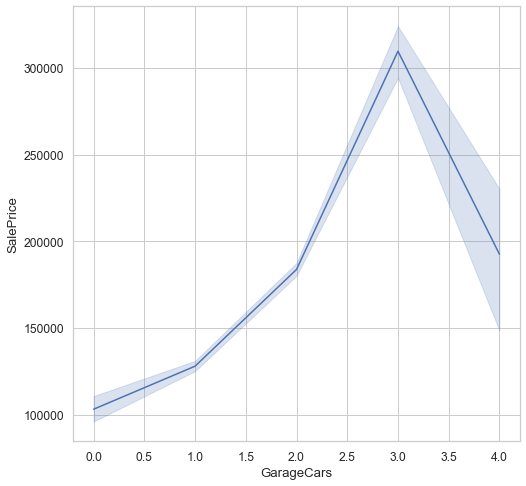

In [121]:
plt.figure(figsize = (8,8))
ax= sns.lineplot(clean_df['GarageCars'], clean_df['SalePrice'])